In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService


service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='pinq-quebec-hub/qai-quantum-algo/default',
    token='50e4f60f02cd247a763d93cbeb949668b4383e6df68ba8a7b4c97b35be7d9cf41f83566cb249b7619d46f081d8349d911392a9d12def4088966310b9168a7f10'
)

# Get the backend
backend = service.get_backend('ibm_quebec')
# Retrieve job lists
jobs_list1 = service.jobs(limit=None, skip=0, backend_name='ibm_quebec', session_id='cq06xjedhsd0008e55jg')
jobs_list2 = service.jobs(limit=None, skip=0, backend_name='ibm_quebec', session_id='cq1yp3rd7we0008hg8h0')
jobs_list3 = service.jobs(limit=None, skip=0, backend_name='ibm_quebec', session_id='cqcjq6w3ptq00086xf60')
jobs_list4 = service.jobs(limit=None, skip=0, backend_name='ibm_quebec', session_id='cq2h0007z1hg008ddwe0')
jobs_list5 = service.jobs(limit=None, skip=0, backend_name='ibm_quebec', session_id='cqda4ehxdecg008w5wy0')
jobs_list6 = service.jobs(limit=None, skip=0, backend_name='ibm_quebec', session_id='cqcmvppxdecg008w4hzg')
jobs_list7 = service.jobs( )
all_jobs = jobs_list1 + jobs_list2 + jobs_list3 + jobs_list4 + jobs_list5 + jobs_list6


# Initialize a list to hold all results
results = []

for job in all_jobs:
    result = job.result()
    results.append(result)



In [20]:
print(results)

[EstimatorResult(values=array([-353.41714488]), metadata=[{'zne': {'noise_amplification': {'noise_amplifier': "<TwoQubitAmplifier:{'noise_factor_relative_tolerance': 0.01, 'random_seed': None, 'sub_folding_option': 'from_first'}>", 'noise_factors': [1, 3, 5], 'values': [-348.4374778746831, -314.9387377969359, -309.68728500840257], 'variance': [33721.43077314369, 36283.70133710949, 37566.49941850483], 'shots': [4000, 4000, 4000]}, 'extrapolation': {'extrapolator': 'LinearExtrapolator'}}, 'warning': 'Optimization level clipped from 2 to 1'}]), EstimatorResult(values=array([-272.78210388]), metadata=[{'zne': {'noise_amplification': {'noise_amplifier': "<TwoQubitAmplifier:{'noise_factor_relative_tolerance': 0.01, 'random_seed': None, 'sub_folding_option': 'from_first'}>", 'noise_factors': [1, 3, 5], 'values': [-277.1906817651187, -256.18451159868664, -270.96633255932795], 'variance': [38438.68215040087, 39749.86558527011, 40258.729253732134], 'shots': [4000, 4000, 4000]}, 'extrapolation': 

In [21]:

vals = [result.values for result in results]
values = []

for val in vals:
    values.append(val[0])
print(values)
len(values)

[-353.41714487638444, -272.782103878721, -307.9253048620514, -321.1843585161395, -357.58019893094774, -311.93378562373647, -373.63981871049157, -383.4109074489869, -328.55086870027003, -277.5257187462003, -308.62979989667366, -147.6202187312776, -292.51265386988115, -268.74349272721173, -278.2162062401471, -304.22830713287453, -330.755133031058, -347.1423755525078, -351.38143036694026, -367.80478912930573, -408.6967469739512, -306.7315477503341, -351.59291522243376, -316.98262421297665, -236.73197514954956, -322.0459047627195, -331.71382831129813, -278.0950115581702, -358.272631516743, -314.5871651232677, -221.1366662643607, -297.63716255614673, -270.8542738372155, -242.7913562389435, -323.24568585596234, -339.0320987321928, -343.6958247377506, -306.83603466788736, -249.83517019270616, -308.9187667846619, -309.9895124470143, -346.5342521614491, -344.34444523437656, -368.10758609783295, -408.31659118982174, -307.80721996116677, -306.4081105198986, -250.896324545229, -261.8915402186537, 

461

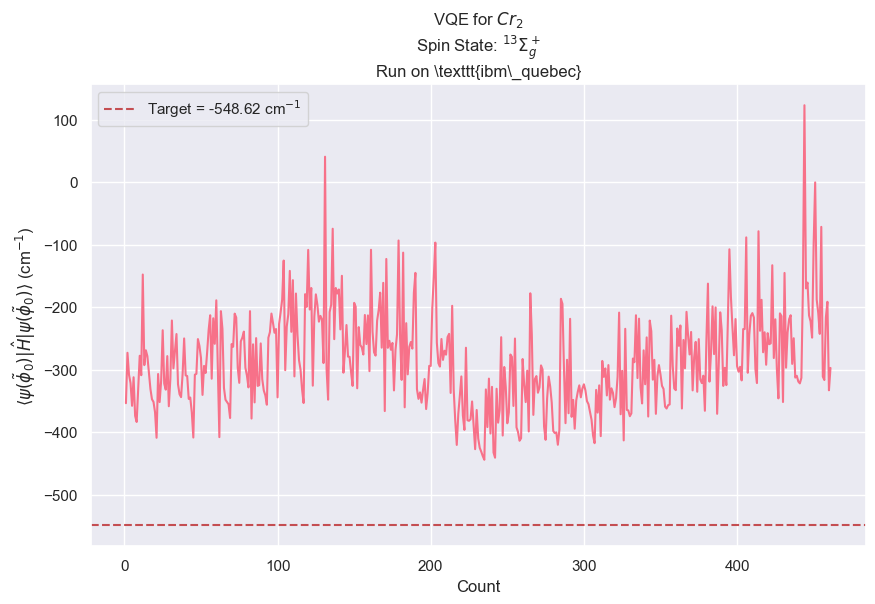

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'vals' is your list of values
sns.set_theme()  # Reset to default theme
sns.set_palette("husl")  # Set the 'husl' color palette

# Create a DataFrame for plotting
x_values = range(1, len(values) + 1)  # Generate x-axis values
df = pd.DataFrame({'Energy': values, 'Index': x_values})

plt.figure(figsize=(10, 6))  # Set figure size
sns.lineplot(x='Index', y='Energy', data=df)  # Plot using Seaborn

# Adding a horizontal line named "target"
target_value = -548.62  # Placeholder, replace with your actual target value
plt.axhline(y=target_value, color='r', linestyle='--', label=rf'Target = {target_value} cm$^{{-1}}$')

# Set plot titles and labels
plt.title(r'VQE for $Cr_{2}$' + '\n' + r'Spin State: $^{13}\Sigma^+_g$'+ '\n' + r'Run on \texttt{ibm\_quebec}')

plt.xlabel('Count')
plt.ylabel(r'$\langle \psi(\tilde{\phi}_0) | \hat{H} | \psi(\tilde{\phi}_0) \rangle$ (cm$^{-1}$)')  # Corrected to remove extra 'h'
plt.grid(True)  # Add grid
plt.legend()  # Show legend to display the "target" label

plt.show()  # Display the plot




